# Example of a Factory Acceptance Test - 2 pumps

This example ilustrates the whole process, from compute, convert, check and report a performance test.

Here, two pumps (TAG A and TAG B) were tested and reported.

In [1]:
from pump import *

## General info

In [2]:
# Teste Sundyne semana 06 de 2025
water = Fluid(
        name="Water",
        density=Q_(1000000, "g/m**3")
    )
water_mix = Fluid(
    name="Water and Hydrocarbon",
    density=Q_(997000 * 0.836, "g/m**3")
)
design_point = DesignPoint(
    fluid=water_mix,
    capacity=Q_(36.7, "m**3/h"),
    head=Q_(240000, "mm"),
    NPSH_available=Q_(3.5, "m"),
    speed_of_rotation=Q_(3550, "rpm"),
    breaking_power=Q_(39.8, "kW")
)

## B-21014A

### Computing the test with water

In [3]:
# Instantiating the performance points semana 06 de 2025
capacity = [14.47, 24.40, 29.45, 36.70, 40.30, 42.25]
inlet_pressure = [210, 205, 200, 195, 195, 190]
outlet_pressure = [28, 27, 26, 25, 23, 22]
load = [31.10, 38.40, 43.30, 47.40, 52.00, 53.80]
test_points_A = [
    TestPoint(
        fluid=water,
        capacity=Q_(i, "m**3/h"),
        inlet_pressure=Q_(j, "mmHg"),
        outlet_pressure=Q_(k, "kgf/cm**2"),
        breaking_power=Q_(l, "kW"),
        speed_of_rotation=Q_(3550, "rpm"),
        inlet_diameter=Q_(3, "in"),
        outlet_diameter=Q_(2, "in"),
    ) for i, j, k, l in zip(capacity, inlet_pressure, outlet_pressure, load)
]

In [4]:
water_curve_A = PerformanceCurve(fluid=water, points=test_points_A)
header = (
    "   Capacity    "
    "Efficiency      "
    "Hydr. Power  "
    "Breaking Power"
)
print(header)
for point in water_curve_A:
    values = (
        f"{point.capacity:6.02f~P}\t"
        f"{point.efficiency:7.02f~P}\t"
        f"{point.hydraulic_power:7.02f~P}\t"
        f"{point.breaking_power:7.02f~P}"
    )
    print(values)

   Capacity    Efficiency      Hydr. Power  Breaking Power
 14.47 m³/h	  35.15 %	  10.93 kW	  31.10 kW
 24.40 m³/h	  46.33 %	  17.79 kW	  38.40 kW
 29.45 m³/h	  47.79 %	  20.69 kW	  43.30 kW
 36.70 m³/h	  52.39 %	  24.83 kW	  47.40 kW
 40.30 m³/h	  48.26 %	  25.10 kW	  52.00 kW
 42.25 m³/h	  46.80 %	  25.18 kW	  53.80 kW


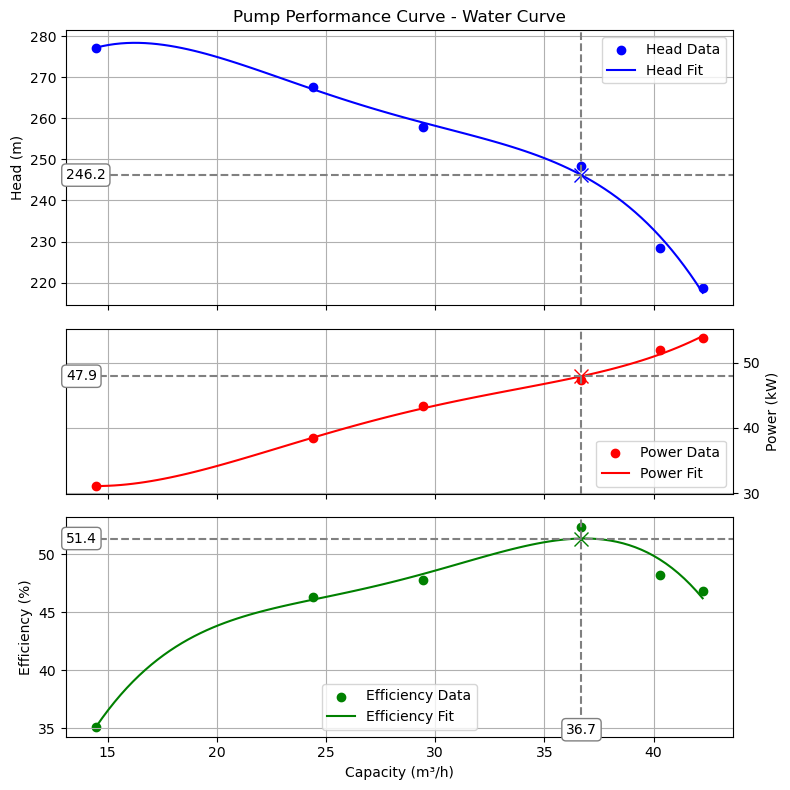

In [5]:
water_curve_A.plot_performance_curve(capacity=Q_(36.7, "m**3/h"))

### Density correction

In [6]:
service_curve_A = water_curve_A.to_fluid(water_mix)
print(header)
for point in service_curve_A:
    values = (
        f"{point.capacity:6.02f~P}\t"
        f"{point.efficiency:7.02f~P}\t"
        f"{point.hydraulic_power:7.02f~P}\t"
        f"{point.breaking_power:7.02f~P}"
    )
    print(values)

   Capacity    Efficiency      Hydr. Power  Breaking Power
 14.47 m³/h	  35.15 %	   9.11 kW	  25.92 kW
 24.40 m³/h	  46.33 %	  14.83 kW	  32.01 kW
 29.45 m³/h	  47.79 %	  17.25 kW	  36.09 kW
 36.70 m³/h	  52.39 %	  20.70 kW	  39.51 kW
 40.30 m³/h	  48.26 %	  20.92 kW	  43.34 kW
 42.25 m³/h	  46.80 %	  20.99 kW	  44.84 kW


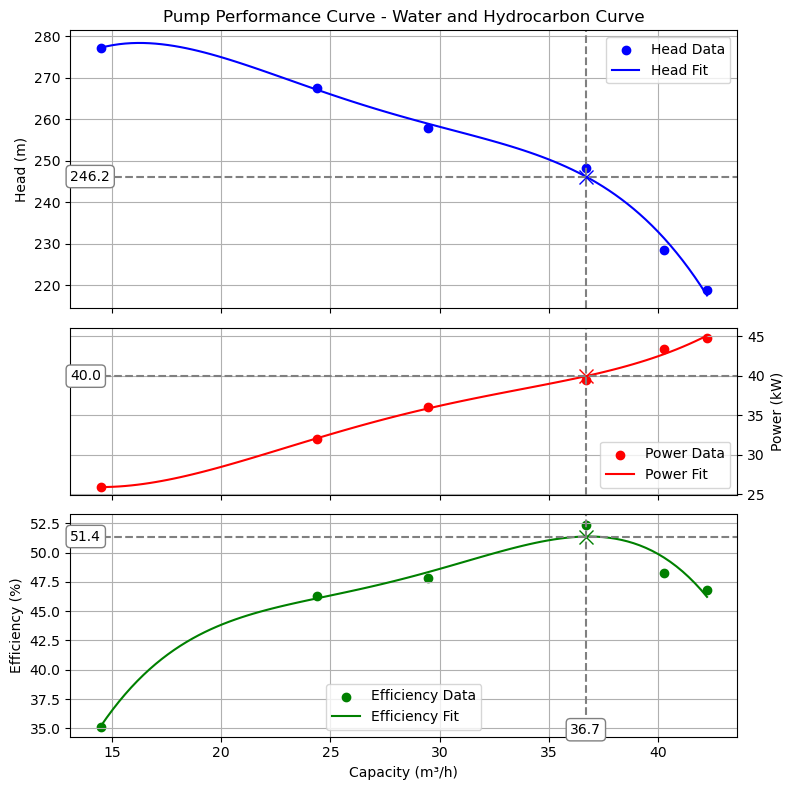

In [7]:
service_curve_A.plot_performance_curve(capacity=Q_(36.7, "m**3/h"))

### Checking Acceptance

In [8]:
checker_A = PerformanceChecker(design_point, service_curve_A)
print(checker_A.test_summary)

+------------+----------+------------------+------------------+--------------+
| Flow       | Head     | Breaking Power   | Hydralic Power   | Efficiency   |
+============+==========+==================+==================+==============+
| 14.47 m³/h | 277.21 m | 25.92 kW         | 9.11 kW          | 35.15 %      |
+------------+----------+------------------+------------------+--------------+
| 24.40 m³/h | 267.58 m | 32.01 kW         | 14.83 kW         | 46.33 %      |
+------------+----------+------------------+------------------+--------------+
| 29.45 m³/h | 257.86 m | 36.09 kW         | 17.25 kW         | 47.79 %      |
+------------+----------+------------------+------------------+--------------+
| 36.70 m³/h | 248.30 m | 39.51 kW         | 20.70 kW         | 52.39 %      |
+------------+----------+------------------+------------------+--------------+
| 40.30 m³/h | 228.52 m | 43.34 kW         | 20.92 kW         | 48.26 %      |
+------------+----------+------------------+--------

In [9]:
print(checker_A.check_summary)

+------------+----------+-----------+----------------+--------------+------------------+---------------+
| Flow       | Head     | Head OK   | Shutoff Head   | Shutoff OK   | Breaking Power   | B. Power OK   |
+============+==========+===========+================+==============+==================+===============+
| 14.47 m³/h | 277.21 m | False     | N/A            | N/A          | 25.92 kW         | True          |
+------------+----------+-----------+----------------+--------------+------------------+---------------+
| 24.40 m³/h | 267.58 m | False     | N/A            | N/A          | 32.01 kW         | True          |
+------------+----------+-----------+----------------+--------------+------------------+---------------+
| 29.45 m³/h | 257.86 m | False     | N/A            | N/A          | 36.09 kW         | True          |
+------------+----------+-----------+----------------+--------------+------------------+---------------+
| 36.70 m³/h | 248.30 m | False     | N/A            | 

In [10]:
print(checker_A.test_summary_with_limits)

+------------+----------+------------+------------+----------------+---------------+---------------+------------------+----------------+
| Flow       | Head     | Head Min   | Head Max   | Shutoff Head   | Shutoff Min   | Shutoff Max   | Breaking Power   | Max B. Power   |
+============+==========+============+============+================+===============+===============+==================+================+
| 14.47 m³/h | 277.21 m | 232.80 m   | 247.20 m   | N/A            | N/A           | N/A           | 25.92 kW         | 41.39 kW       |
+------------+----------+------------+------------+----------------+---------------+---------------+------------------+----------------+
| 24.40 m³/h | 267.58 m | 232.80 m   | 247.20 m   | N/A            | N/A           | N/A           | 32.01 kW         | 41.39 kW       |
+------------+----------+------------+------------+----------------+---------------+---------------+------------------+----------------+
| 29.45 m³/h | 257.86 m | 232.80 m   | 24

## B-21014 B

In [11]:
# Instantiating the performance points Teste Sundyne semana 06 de 2025
capacity = [14.71, 25.15, 29.43, 37.37, 40.37, 42.20]
inlet_pressure = [200, 190, 190, 170, 160, 160]
outlet_pressure = [28, 26, 24.5, 24.5, 23, 22]
load = [29.5, 38.50, 41.1, 49.5, 49.8, 52.9]
test_points_B = [
    TestPoint(
        fluid=water,
        capacity=Q_(i, "m**3/h"),
        inlet_pressure=Q_(j, "mmHg"),
        outlet_pressure=Q_(k, "kgf/cm**2"),
        breaking_power=Q_(l, "kW"),
        speed_of_rotation=Q_(3550, "rpm"),
        inlet_diameter=Q_(3, "in"),
        outlet_diameter=Q_(2, "in"),
    ) for i, j, k, l in zip(capacity, inlet_pressure, outlet_pressure, load)
]

### Creating the curves

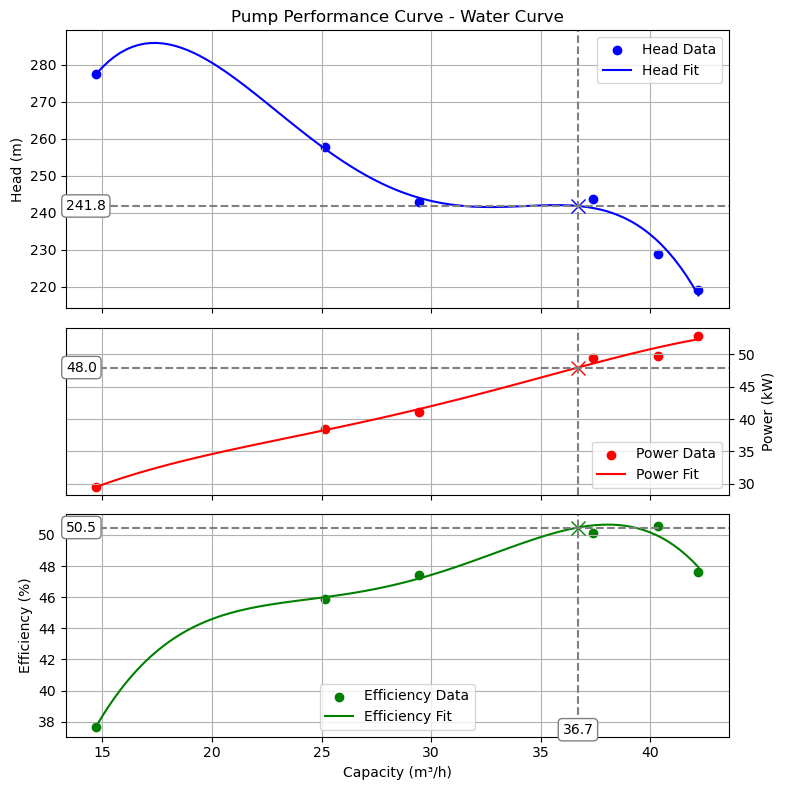

In [12]:
water_curve_B = PerformanceCurve(fluid=water, points=test_points_B)
water_curve_B.plot_performance_curve(capacity=Q_(36.7, "m**3/h"))

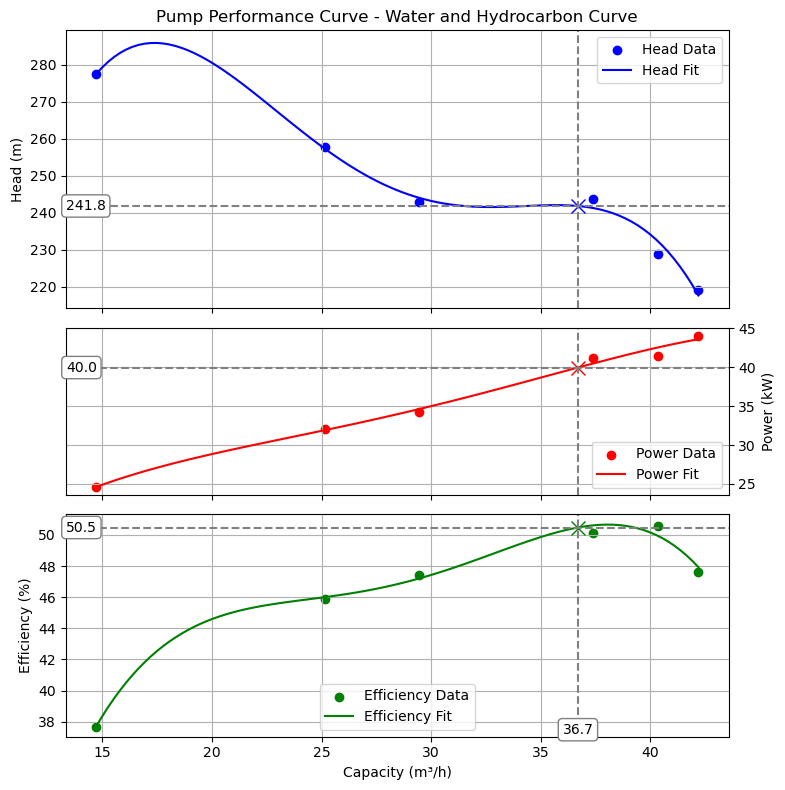

In [13]:
service_curve_B = water_curve_B.to_fluid(water_mix)
service_curve_B.plot_performance_curve(capacity=Q_(36.7, "m**3/h"))

### Checking acceptance

In [14]:
checker_B = PerformanceChecker(design_point, service_curve_B)
print(checker_B.test_summary)

+------------+----------+------------------+------------------+--------------+
| Flow       | Head     | Breaking Power   | Hydralic Power   | Efficiency   |
+============+==========+==================+==================+==============+
| 14.71 m³/h | 277.35 m | 24.59 kW         | 9.27 kW          | 37.69 %      |
+------------+----------+------------------+------------------+--------------+
| 25.15 m³/h | 257.81 m | 32.09 kW         | 14.73 kW         | 45.89 %      |
+------------+----------+------------------+------------------+--------------+
| 29.43 m³/h | 243.00 m | 34.26 kW         | 16.24 kW         | 47.42 %      |
+------------+----------+------------------+------------------+--------------+
| 37.37 m³/h | 243.68 m | 41.26 kW         | 20.68 kW         | 50.13 %      |
+------------+----------+------------------+------------------+--------------+
| 40.37 m³/h | 229.00 m | 41.51 kW         | 21.00 kW         | 50.59 %      |
+------------+----------+------------------+--------

In [15]:
print(checker_B.check_summary)

+------------+----------+-----------+----------------+--------------+------------------+---------------+
| Flow       | Head     | Head OK   | Shutoff Head   | Shutoff OK   | Breaking Power   | B. Power OK   |
+============+==========+===========+================+==============+==================+===============+
| 14.71 m³/h | 277.35 m | False     | N/A            | N/A          | 24.59 kW         | True          |
+------------+----------+-----------+----------------+--------------+------------------+---------------+
| 25.15 m³/h | 257.81 m | False     | N/A            | N/A          | 32.09 kW         | True          |
+------------+----------+-----------+----------------+--------------+------------------+---------------+
| 29.43 m³/h | 243.00 m | True      | N/A            | N/A          | 34.26 kW         | True          |
+------------+----------+-----------+----------------+--------------+------------------+---------------+
| 37.37 m³/h | 243.68 m | True      | N/A            | 

In [16]:
print(checker_B.test_summary_with_limits)

+------------+----------+------------+------------+----------------+---------------+---------------+------------------+----------------+
| Flow       | Head     | Head Min   | Head Max   | Shutoff Head   | Shutoff Min   | Shutoff Max   | Breaking Power   | Max B. Power   |
+============+==========+============+============+================+===============+===============+==================+================+
| 14.71 m³/h | 277.35 m | 232.80 m   | 247.20 m   | N/A            | N/A           | N/A           | 24.59 kW         | 41.39 kW       |
+------------+----------+------------+------------+----------------+---------------+---------------+------------------+----------------+
| 25.15 m³/h | 257.81 m | 232.80 m   | 247.20 m   | N/A            | N/A           | N/A           | 32.09 kW         | 41.39 kW       |
+------------+----------+------------+------------+----------------+---------------+---------------+------------------+----------------+
| 29.43 m³/h | 243.00 m | 232.80 m   | 24

## Generating the report

### Organizing the input data

In [17]:
# Step 1: Adding some data
equipament_description = {
    "TAG": "B-21014A/B",
    "Service": "Light Naphtha Pump",
    "Serial Number": "A1881559-03-04",
    "Manufacturer": "SUNDYNE CORPORATION",
    "Model": "LMV-311 / OH6"
}
test_data = {
    "B-21014A" : {
        "Performance Curve - Water" : water_curve_A.plot_performance_curve(capacity=design_point.capacity,return_io=True),
        "Performance Curve - Service Fluid" : service_curve_A.plot_performance_curve(capacity=design_point.capacity, return_io=True),
        "test_summary" : checker_A.report_summary,
        "test_data" : service_curve_A.test_data,
    },
    "B-21014B" : {
        "Performance Curve - Water" : water_curve_B.plot_performance_curve(capacity=design_point.capacity,return_io=True),
        "Performance Curve - Service Fluid" : service_curve_B.plot_performance_curve(capacity=design_point.capacity, return_io=True),
        "test_summary" : checker_B.report_summary,
        "test_data" : service_curve_B.test_data,
    }
}
# Step 2: Prepare Report Data
report_data = {
    "design_point" : design_point,
    "equipment_description": equipament_description,
    "test_data" : test_data
}

### In Portuguese

In [18]:
report_generator = ReportGenerator(language="pt")
output_filename = report_generator.generate_report(report_data)
print(f"📄 Report generated: {output_filename}")

Novo documento salvo em: Relatório_B-21014AB_12-03-2025.docx
📄 Report generated: Relatório_B-21014AB_12-03-2025.docx


### In English

In [19]:
report_generator = ReportGenerator(language="en")
output_filename = report_generator.generate_report(report_data)
print(f"📄 Report generated: {output_filename}")

New document saved at: Report_B-21014AB_12-03-2025.docx
📄 Report generated: Report_B-21014AB_12-03-2025.docx
